In [2]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np

In [3]:
sbn.set()

# Comentarios iniciales

Primero me gustaría hacer una **gran advertencia**: 
> Este notebook y todos los que vienen estarán escritos de en la misma manera en la que doy mis clases, con un tono informal, sin asumir que hay una voz universal y máxima de conocimiento. Si notas errores puedes comentarlos y si te animas puedes colaborar a corregirlos.
Nunca me he sentido cómodo de aprender de las grandes e inalcanzables mentes, existen y está bien pero simplemente no me siento cómodo y por eso mismo incluso hago estos notebooks. El conocimiento no debería de quedarse limitado a aulas y los y las catedráticas no deberían de ser los y las únicas poseedoras del conocimiento, en cambio, creo que lo podemos sino democratizar sí facilitar.  

Adicional a lo anterior voy a asumir que tienes conocimientos en lo que yo llamo _python para sistemas_: conocimiento de iteradores, numpy y matplotlib o seaborn. A esto le llaman también cómputo númerico pero yo así le puse a mi tutorial; si quieres darle una repasada a tu python puede encontrar también un breve taller/curso, o cual sea el nombre que le podamos dar: [python para sistemas](https://github.com/uncrayon/python-para-sistemas). 

Por último, Daniel Shiffman (The Coding Traing) resuelve casi todos los problemas usando processing y p5.js. Processing está sobre java mientras que p5.js es un _framework_ de javascript. Aquí vamos a usar python y esto es porque python es súper fácil de leer y además la gran mayoría de personas que tengo cercanas tienen nociones del mismo (así también estoy considerando hacer un fork en R). 

Pasando los tres puntos anteriores ahora sí, vamos al problema. 

_Si existe alguna forma de hacer posdata en un texto esto es eso: Adicional a las notas anteriores me gustaría decir que muchas veces escribiendo no soy tan elocuente como lo podría ser hablando y viceversa entonces cualquier duda échala por aquí o a mi correo y la checamos en conjunto. Preferiría que la pusieras acá porque además así queda registro para que otras personas puedan acceder a la discusión y quede como banco de dudas_

# El oscilador armónico

Antes de hablar del péndulo me gustaría que platicaramos del oscilador armónico. 

Supón que hay una masa atada a un resorte y este está fijo a una pared.

![oscilador_1](./img/oscilador_1.png)

Supón también que cuando el oscilador está en reposo en una posición que llamaremos $x_0$ y para simplificar la vida diremos que $x_{0} = 0$. Hasta ahora el problema está en una dimensión entonces no se tiene que incluir notación vectorial: ni negritas, ni flechas. Análisis rápido ¿Por qué está en una dimensión? No hay _niguna fuerza_ actuando en la componente $y$ o en la componente $z$ y por ello se puede reducir la expresión al eje $x$ entonces las ecuaciones que antes eran vectoriales se reducen a expresiones escalares, más adelante hay problemas 3D.   

Hasta ahora no hay ecuaciones, la masa está estática y el resorte en reposo. Por el bien del tutorial jalo la masa, la llevo a una posición $x_{1}$ y la suelto

![oscilador_2](./img/oscilador_2.png)

Y momentos después alcanza la posición $x_{2}$. Como no hay fricción no hay disipación de energía entonces la masa y el resorte se quedarán haciendo se movimiento hasta que alguien interfiera de alguna manera. Claramente la mécanica ideal se escapa de las leyes de la termodinámica. 

El fenómeno de jalar la masa y que esta vaya y venga se llama _oscilación_ y la cantidad de veces que pasa por el punto $x_1$ (o el $x_2$ o el $x_0$) en un segundo se le llama _frecuencia_. Al tiempo en que tarda en regresar la masa al punto $x_1$ partiendo del punto $x_{1}$ se llama periodo y todas estas medidas nos caracteristicas de un péndulo y nos ayudan a describirlo. Si bien medir esas cantidades ayuda a describir este oscilador no ayuda a describir ni predecir cualqueir otro oscilador por ello se necesita hacer una _generalización_, esto es aprender a describir bien al sistema e incluso predecirlo. 

Para lo anterior partamos de la [ley de Hooke](https://es.wikipedia.org/wiki/Ley_de_elasticidad_de_Hooke). Es posible escribirla (bajo la convención adecuada) como la siguiente _fuerza restaurativa_ (restaurativa porque tiene un menos):

$$
 F_{s} = - k x
$$

Donde $F_{s}$ es la fuerza que ejerce el resorte sobre la masa. Notemos que la fuerza crece entre más lejos este del punto de reposo la masa.   

Vamos a analizar un poco la situación. Si $x=0$ entonces $F_{s}(x=0) = 0$, es decir, está en reposo la masa ya que el resorte no ejece ninguna fuerza sobre ella. Si $x>0$ entonces $F_{s}(x)<0$ y esto quiere decir que el resorte _está jalando_ a la masa su punto de reposo, mientras que si $x<0$ entonces $F_{s}(x)>0$ lo que quiere decir que el resorte _está empujando_ a la masa al punto de reposo. 

Pasado lo anterior es momento de llamar, como en todo problema de mécanica, a la segunda ley de Newton:

$$
F = ma
$$

Ahora, lo anterior se puede formular también en términos de una segunda derivada:

$$
F = m a = m \frac{d^{2}x}{dt^{2}}
$$

Siguiendo la segunda de Newton tenemos que la fuerza en que el resorte aplica sobre la caja es describible también en términos de su aceleración y masa de tal suerte que:

$$
 m \frac{d^{2}x}{dt^{2}} = -k x
$$

Y así llegamos a una ecuación diferencial ordinaria de segundo orden, si resolvemos la ecuación entonces encontramos un forma de describir y predecir el comportamiento de cualquier resorte. Esta ecuación es resoluble analíticamente sin embargo la gran basta cantidad de ecuaciones que encontraremos en la realidad no lo son y tendremos que recurrir a los métodos númericos, para avanzar vamos a visitar al más sencillo de todos ellos: el método de Euler. 

## Método de Euler 

Para comenzar a hablar de este método númerico de solución de ecuaciones diferenciales ordinarias primero debemos de hablar de EDOs (Ecuaciones diferenciales ordinarias, ODEs en inglés). 

Cualquier ecuación diferencial ordinaria de primer orden se puede escribir como sigue:

$$
\frac{dy}{dt}= y' = f(y,t)
$$

Donde a $f(y,t)$ se le llama la _función pendiente_ (aquí vale la pena mencionar que la aproximación geométrica a la derivada es a través de la secante cuando tiende a la pendiente). 

Ahora bien, es de notar que la definición formal de la derivada de una función $y(t)$ se puede expersar como sigue:

$$
\frac{dy}{dt} = \lim_{h \to 0} \frac{y(t+h) - y(t)}{h}
$$

_de manera informal_ se puede tomar $h\approx 0$ y entonces lo anterior se puede escribir como:

$$
\frac{dy}{dt} \approx \frac{y(t+h) - g(t)}{h}
$$

Si se sigue bajo el supuesto de $h\approx 0$ entonces se puede _aproximadamente decir_ que:

$$
\frac{y(t+h) - y(t)}{h} \approx f(y,t)
$$

Con lo cual tienes que:

$$
y(t+h) \approx hf(y,t) + y(t)
$$

En algunos libros y artículos escriben la relación anterior como:

$$
y(t+\Delta t) \approx \Delta t f(y,t) + y(t)
$$

Aquí me voy a referir a este sistema con notación de subíndices abusando de la discretización:

$$
y_{n+1} = hf(y_{n},t_{n}) + y_{n}
$$

Nota que para resolver esta ecuación se necesita partir de un $y_{0} = y(t_{0})$, a este punto se le llama _condición inicial_. 
> **Nota Primera**: Necesitamos el punto $y_{0}$ porque si hacemos $n=0$ entonces $y_{1} = hf(y_{0},t_{0}) + y_{0}$. Entonce para calcular $y_{1}$ necesitamos el $y_{0}$, para el $y_{2}$ el $y_{1}$ y así sucesivamente.

> **Nota Segunda**: Al sistema presentado se le llama sistema de Euler-Cromer o _Euler hacia adelante_, lo cual no significa que a partir de una condición inical no se pueda ir hacia el pasado. Simplemente el sistema de índices es conveniente para tratar el problema hacia el futuro. Así pues es posible calcular $y_{-1}$ aunque se recomienda evitar usar el mismo sistema índicial para asumir confusión. 

## Un primer ejemplo al método de Euler.

Quizás el primer problema que siempre se presenta en de EDOs es o bien un decaímiento nuclear o un decaímiento de bacterias en un cultivo por antibióticos. Sin importar el ejemplo el sistema de EDOs es el mismo:

$$
\frac{dy}{dt} = -ky
$$

Donde $k$ es la _constante de decaímiento_ y $y(t)$ es la población al tiempo $t$.

La solución analítica de este problema es:
$$
y(t) = y_{0} e^{-kt}
$$

Pero esta vez lo que se busca no es comprobar la solución analítica sino resolver el problema de manera númerica. Para esto se supondrá que $k=0.1$ y $y_{0} = 1000$ y con esto eñ sistema númerico, tomando $h=0.01$, es entonces el siguiente:

$$
y_{n+1} = 0.01 (-0.1*y_{n}) + y_{n}
$$

Como ya está definida la condición inicial, la constante de decaímiento y el tamaño del paso ($h$) entonces ya es posible realizar la simulación. Ahora bien, se debe que incluir una condición de alto pues de no hacerlo el sistema iterará al infinito, se llenará la memoria RAM y se llorará al computador.

In [12]:
def euler_decaimiento(y0,t0=0,k=-0.1,t_max=50,dt=0.01):
    """
    Esta función realiza la integración númerica de una ecuación del tipo
    y'=-ky
    
    Params
    ---------
    y0 : float,int
        Condición inicial del problema
    
    t0  : float, int
        Tiempo en el que inicia el sistema, corresponde a la condición
        inicial
        
    k : float
        Constante de decaímiento del sistema
    
    t_max : float, int
        Tiempo máximo para simulación, o bien se queda por debajo o bien
        se alcanza.
    
    dt : float
        También denotado como h. Es el tamaño de paso que vamos a relizar
        por el campo de pendientes o bien el tamaño de paso que vamos a dar
        en el tiempo.
    """
    Y,T = [y0],[t0]
    t = t0
    i = 0
    while t<=t_max:
        Y.append(dt*k*Y[i]+Y[i])
        T.append(T[i]+dt)
        t = t+dt
        i = i+1
    return Y,T

Ya con la función vamos a compara la solución analítica contra la númerica para un $t_{max}=50$

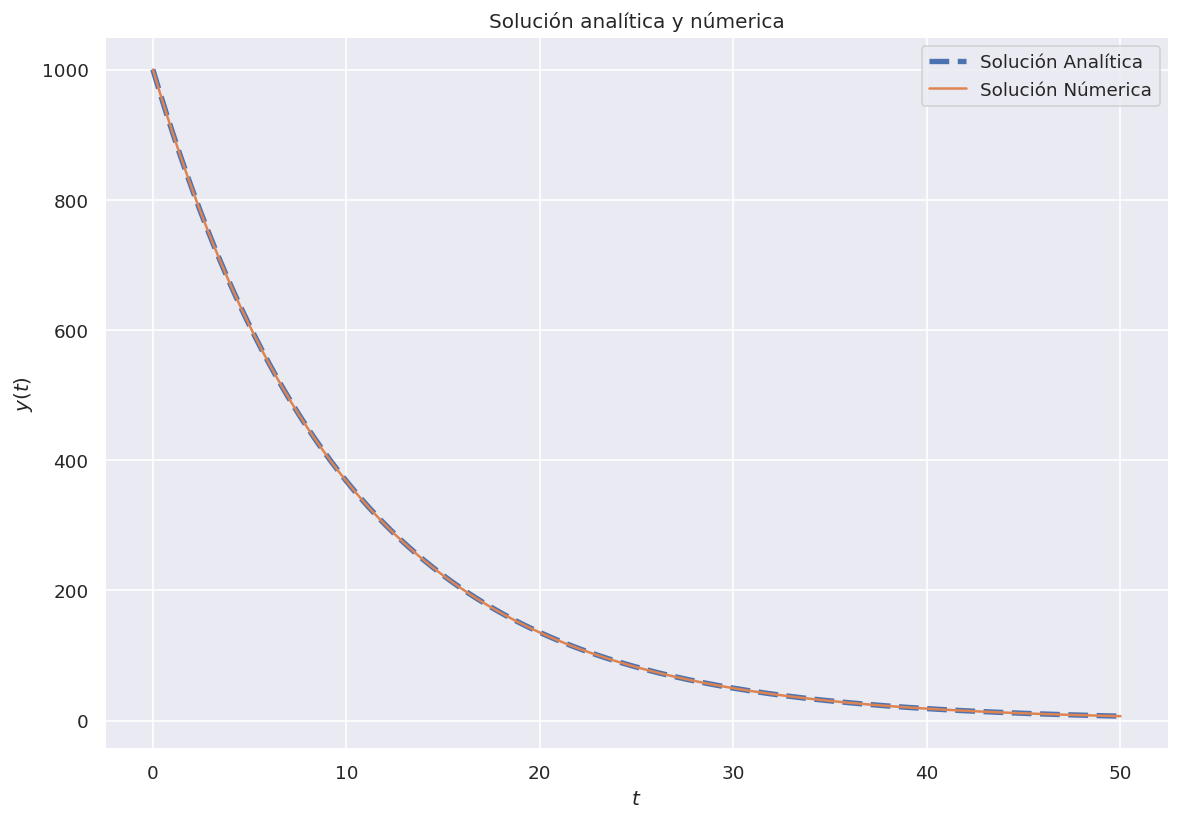

In [24]:
fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=120)

# Aquí calculamos la solución analítica
t = np.linspace(0,50,1000)
f = lambda t:1000*np.exp(-t*0.1)
y = f(t)

# Aquí calculamos la solución númerica
Y,T = euler_decaimiento(y0=1000)

ax.plot(t,y,label='Solución Analítica',ls='--',lw=3.2)
ax.plot(T,Y,label='Solución Númerica')

ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solución analítica y númerica')
ax.legend()

fig.tight_layout()
plt.show()

Es de notar que la solución analítica y númerica parecen ser casi la misma. Vamos qué pasa si hacemos variar el parámetro $h$.

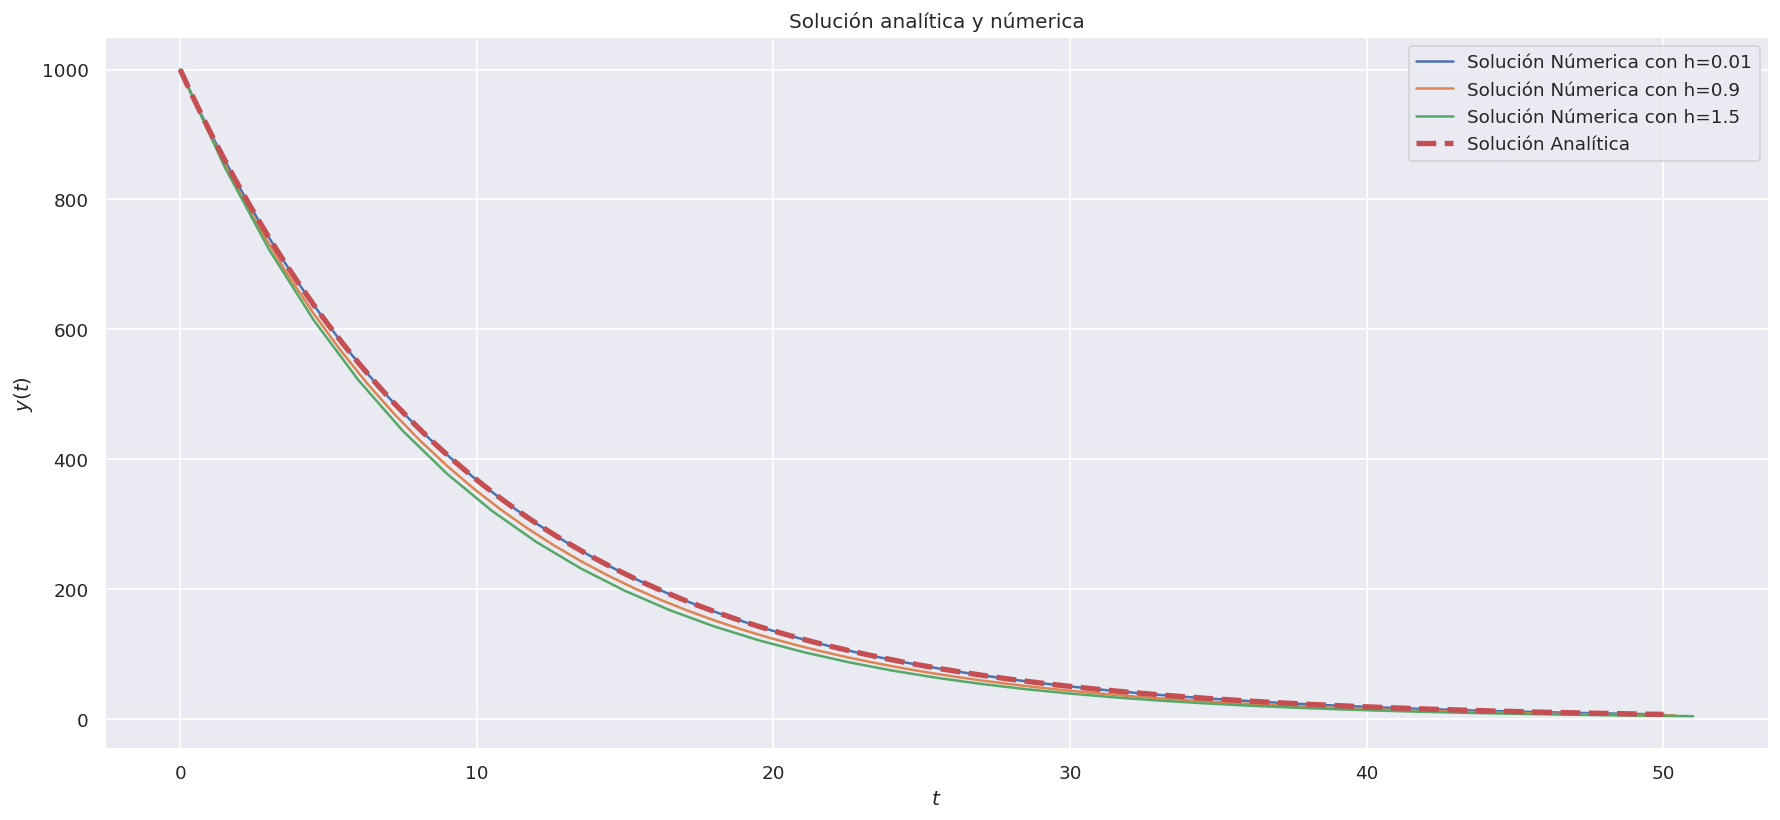

In [29]:
fig,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)

# Aquí calculamos la solución analítica
t = np.linspace(0,50,1000)
f = lambda t:1000*np.exp(-t*0.1)
y = f(t)

# Aquí calculamos la solución númerica
for h in [0.01,0.9,1.5]:
    Y,T = euler_decaimiento(y0=1000,dt=h)
    ax.plot(T,Y,label='Solución Númerica con h={}'.format(h))
ax.plot(t,y,label='Solución Analítica',ls='--',lw=3.2)


ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solución analítica y númerica')
ax.legend()

fig.tight_layout()
plt.show()

Conforme crece el valor del tamaño de paso $h$ las soluciones númericas se desvían de la solución original, a esto se le llama _el error del método_ y éste se crece como $\epsilon\sim h^{2}$